In [1]:
# load responses.json

import json

with open('responses.json') as f:
    data = json.load(f)

print(data)

[{'_id': '63e7ea4b09dcfa1146ab7207', 'participantId': 'znbj9u4jk4a9rvod81i8m4', 'gameNumber': 1, 'score': 75, 'timestamp': '2023-02-11T19:19:39.146Z'}, {'_id': '63e7ea8409dcfa1146ab7208', 'participantId': 'znbj9u4jk4a9rvod81i8m4', 'gameNumber': 2, 'score': 143, 'timestamp': '2023-02-11T19:20:36.392Z'}, {'_id': '63e7eaab09dcfa1146ab7209', 'participantId': 'znbj9u4jk4a9rvod81i8m4', 'gameNumber': 3, 'score': 125, 'timestamp': '2023-02-11T19:21:15.443Z'}, {'_id': '63e7eabd09dcfa1146ab720a', 'participantId': 'znbj9u4jk4a9rvod81i8m4', 'gameNumber': 4, 'score': 75, 'timestamp': '2023-02-11T19:21:33.536Z'}, {'_id': '63e8f94009dcfa1146ab720c', 'participantId': '6gfr32yn6h55jtkucl4tq4', 'gameNumber': 0, 'score': 121, 'timestamp': '2023-02-12T14:35:43.842Z'}, {'_id': '63e8f95709dcfa1146ab720d', 'participantId': '6gfr32yn6h55jtkucl4tq4', 'gameNumber': 1, 'score': 88, 'timestamp': '2023-02-12T14:36:07.352Z'}, {'_id': '63e8f97009dcfa1146ab720e', 'participantId': '6gfr32yn6h55jtkucl4tq4', 'gameNumber

In [8]:
# group data by participantId

participants = {}

for response in data:
    participantId = response['participantId']
    # if response['score'] is an object ignore it
    if isinstance(response['score'], dict):
        continue
    # ignore data before may 25th using timestamps as a string
    if response['timestamp'] < '2023-05-25':
        continue
    if participantId not in participants:
        participants[participantId] = []
    participants[participantId].append(response)

# filter out participants with at least 5 responses

participants = {k: v for k, v in participants.items() if len(v) >= 5}

# make into array

scores = list(participants.values())
scores = [score for participant in scores for score in participant]


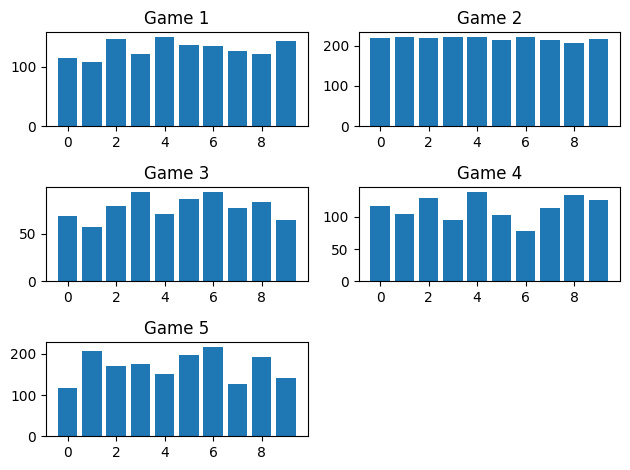

In [9]:
# plot scores

import matplotlib.pyplot as plt

for i in range(5):
  gameScores = [score['score'] for score in scores if score['gameNumber'] == i]

  # subplot
  plt.subplot(3, 2, i+1)
  # bar charts
  plt.bar(range(len(gameScores)), gameScores)
  # title
  plt.title('Game ' + str(i+1))
  # make title fit
  plt.tight_layout()
  

plt.show()
